#eICU Tutorial: Vital Sign Visualization

The eICU Collaborative Research Database contains deidentified patient data collected through Philips Healthcare's eICU program. The program is a telehealth system designed to improve clinical outcomes and support management of intensive care unit (ICU) patients. The goal of this tutorial is to introduce you to BigQuery and eICU database, and provide instruction on how to access patient vital signs.

For more information on the eICU telehealth system, please refer to the following:
* eICU Collaborative Research Database Official Site: https://eicu-crd.mit.edu/
* Nature Article on "The eICU Collaborative Research Database, a freely available multi-center database for critical care research" (Pollard et al, 2018): https://www.nature.com/articles/sdata2018178
* Philips Hospital Telehealth: https://www.usa.philips.com/healthcare/product/HC865325ICU/eicu-program-telehealth-for-the-intensive-care-unit

##Prequisites

Have a valid and accessible Gmail account to run this tutorial. If you do not have one, you can create one at http://gmail.com.

Note that formal access to the eICU Database requires that you complete an online CITI course and request access through PhysioNet. Refer to https://eicu-crd.mit.edu/gettingstarted/access/ for detailed directions on how to obtain database access. 

Please also create a copy of this Colab notebook by clicking "File" > "Save a copy in Drive..." so that you can run queries. 

##Setup

Accessing, querying, visualizing and plotting of data from the eICU database requires several libraries, as shown in the cell below. Run the initialization code by clicking the empty square brackets [ ] in the upper left-hand corner of the following cell. Confirm that you are connected to a Google Compute Engine by looking for a green check mark next to the word "CONNECTED" in the upper right-hand corner of this tutorial. 

In [0]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

# Below imports are used to print out pretty pandas dataframes
from IPython.display import display, HTML

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

You will need to authenticate yourself to run any queries using BigQuery by running the cell below. You will then be asked to click on a provided link, and copy/paste a verification code into an empty text box. 

In [0]:
auth.authenticate_user()

Because physionet-data has read-only access, you will need to refer to a project available on BigQuery by referencing its project_id. The eICU project has been provided below, so merely run the sequential cell.

In [0]:
project_id='hst-953-2018'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

To execute a query on Google BigQuery, run the code below. 'run_query' references a function that allows you to not only query the eICU project, but also read the results into a pandas DataFrame.

In [0]:
# Read data from BigQuery into pandas dataframes.
def run_query(query):
  return pd.io.gbq.read_gbq(query, project_id=project_id, verbose=False, configuration={'query':{'useLegacySql': False}})

#Plotting Vital Signs

The queries below yield patient stay and vital sign information (specifically recorded temperatures, heart rates, and systolic/diastolic pressures) for patients in eICU-supported ICUs. 

Query 1 generates a table containing the patient unit stay ID and diagnosis string. The patient unit stay ID is a foreign key linking different tables in the eICU database. The diagnosis string is a path string of the diagnosis selected in eCareManager (https://www.usa.philips.com/healthcare/product/HC865325CM/ecaremanager-enterprise-telehealth-software) to give you a sense of a patient's state of health.

In [0]:
## Query 1


df = run_query('''
SELECT
  DISTINCT vital.patientUnitStayID,
  diagnosis.diagnosisString
FROM `physionet-data.eicu_crd_demo.vitalperiodic` AS vital
INNER JOIN `physionet-data.eicu_crd_demo.diagnosis` AS diagnosis 
    ON vital.patientUnitStayID = diagnosis.patientUnitStayID
WHERE vital.temperature IS NOT NULL AND vital.heartRate IS NOT NULL AND vital.respiration IS NOT NULL AND vital.systemicSystolic IS NOT NULL AND vital.systemicDiastolic IS NOT NULL;
''')

display(df)

## Note that Line 11 was included to ensure that the patient unit stay IDs appearing in the query output have some non-null temperature, heart rate, respiration and blood pressure values. This line is optional and can be removed.  

Query 2 yields plots of a patient's heart rate, respiration and blood pressure during an ICU stay. A patient unit stay ID of '1023508' was used as an example, but this can be changed to any ID outputted in Query 1. 

Text(0,0.5,u'Systemic Diastolic Pressure (mmHg)')

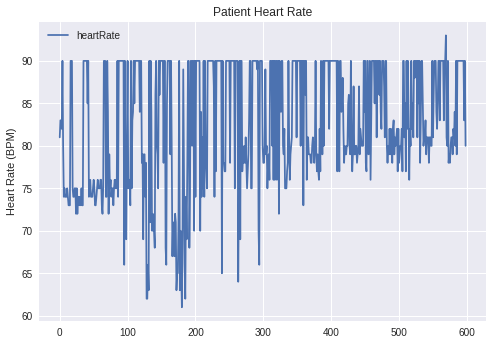

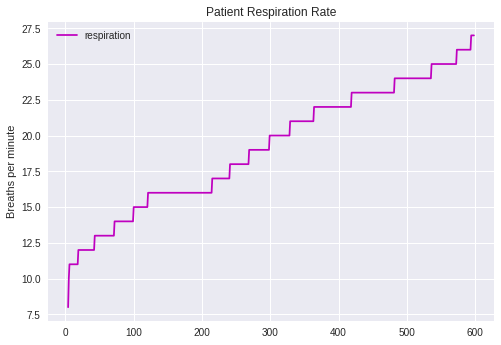

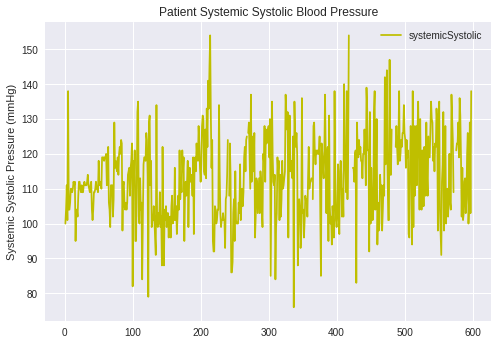

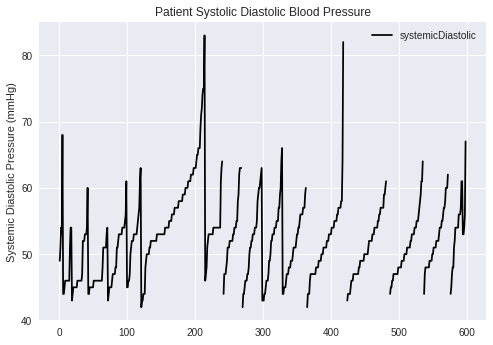

In [65]:
## Query 2

df = run_query('''
  SELECT
    vital.heartRate,
    vital.respiration,
    vital.systemicSystolic,
    vital.systemicDiastolic
  FROM `physionet-data.eicu_crd_demo.vitalperiodic` AS vital
  WHERE vital.patientUnitStayID = 1023508; 
''')

ax1 = df.plot(title = 'Patient Heart Rate', kind='line',y='heartRate')
ax1.set_ylabel('Heart Rate (BPM)')

ax2 = df.plot(title = 'Patient Respiration Rate', kind='line',y='respiration',color = 'm')
ax2.set_ylabel('Breaths per minute')

ax3 = df.plot(title = 'Patient Systemic Systolic Blood Pressure', kind='line',y='systemicSystolic',color = 'y')
ax3.set_ylabel('Systemic Systolic Pressure (mmHg)')

ax4 = df.plot(title = 'Patient Systolic Diastolic Blood Pressure', kind='line',y='systemicDiastolic', color = 'k')
ax4.set_ylabel('Systemic Diastolic Pressure (mmHg)')